In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True) # pour avoir un index de type datetime

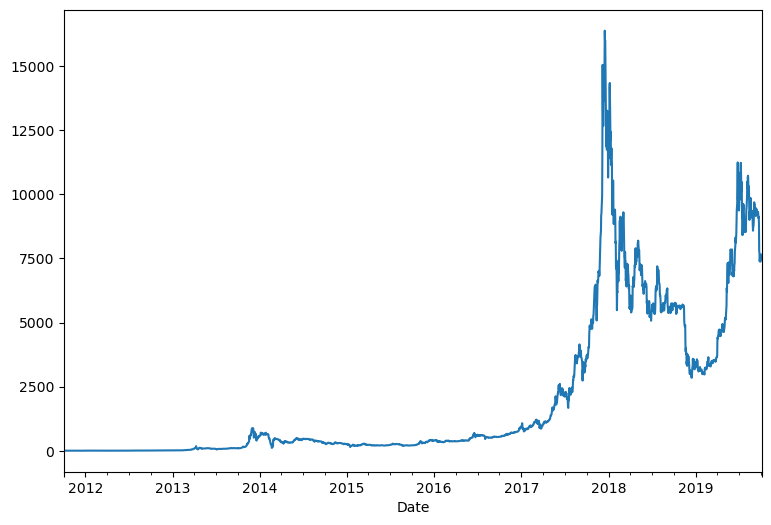

In [14]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [11]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

<Axes: xlabel='Date'>

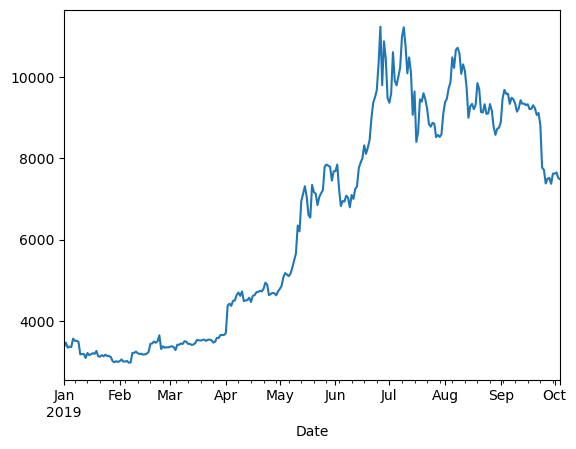

In [17]:
bitcoin.loc['2019']['Close'].plot()

<Axes: xlabel='Date'>

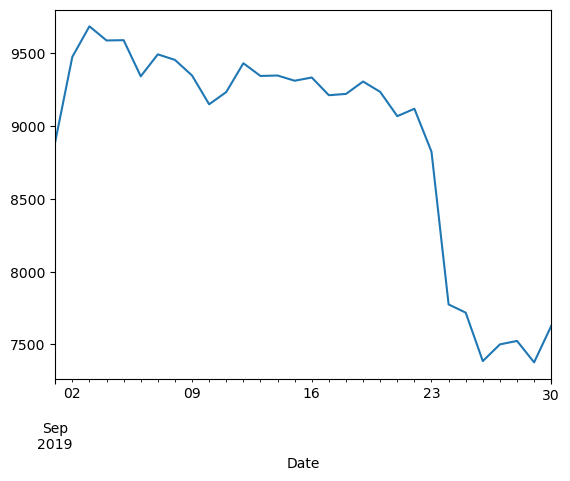

In [18]:
bitcoin.loc['2019-09']['Close'].plot()

<Axes: xlabel='Date'>

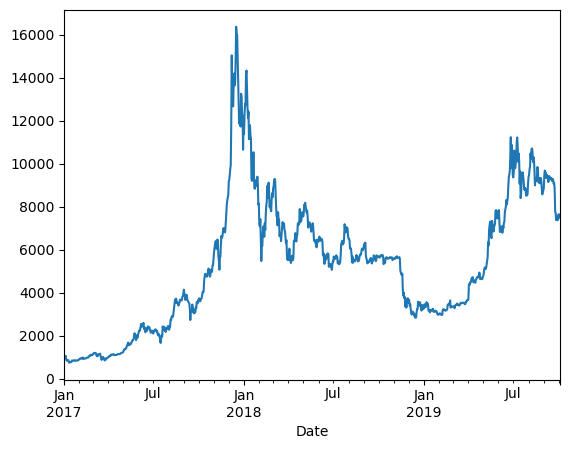

In [19]:
bitcoin.loc['2017':'2019']['Close'].plot()

<Axes: xlabel='Date'>

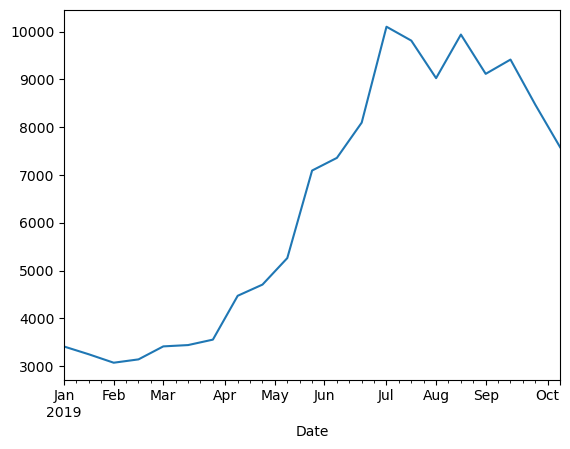

In [31]:
 # resample permet de regrouper nos données selon une fréquence
bitcoin.loc['2019','Close'].resample('2W').mean().plot()

<Axes: xlabel='Date'>

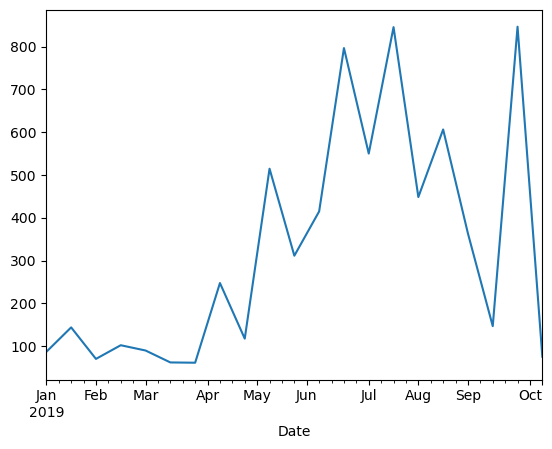

In [32]:
bitcoin.loc['2019','Close'].resample('2W').std().plot()

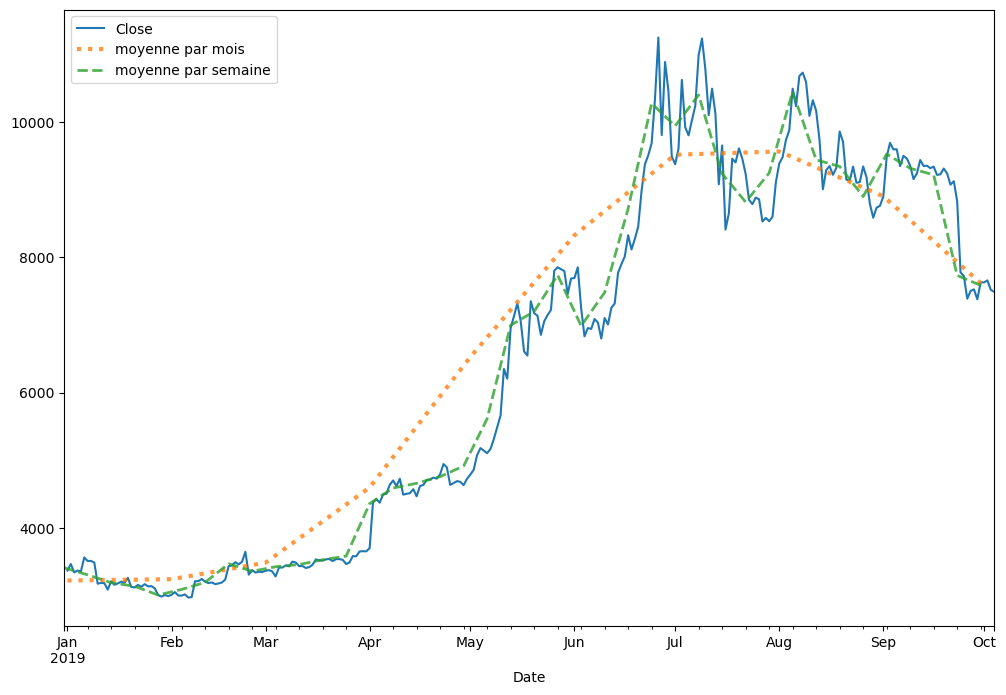

In [36]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019','Close'].resample('ME').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019','Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [37]:
bitcoin.loc['2019','Close'].resample('W').agg(['mean', 'std', 'min','max'])

,mean,std,min,max
Date,,,,
2019-01-06,3413.619995,86.412199,3345.330078,3565.800049
2019-01-13,3308.722830,187.370818,3090.370117,3513.979980
2019-01-20,3193.085728,42.170285,3129.989990,3263.669922
2019-01-27,3139.568534,20.884335,3110.709961,3171.270020
2019-02-03,3010.647182,21.591732,2986.850098,3054.060059
2019-02-10,3093.135742,125.474356,2973.739990,3247.080078
2019-02-17,3196.895717,21.848029,3171.590088,3238.939941
2019-02-24,3472.014334,100.274323,3311.520020,3648.610107
2019-03-03,3361.397147,13.607572,3343.159912,3378.629883


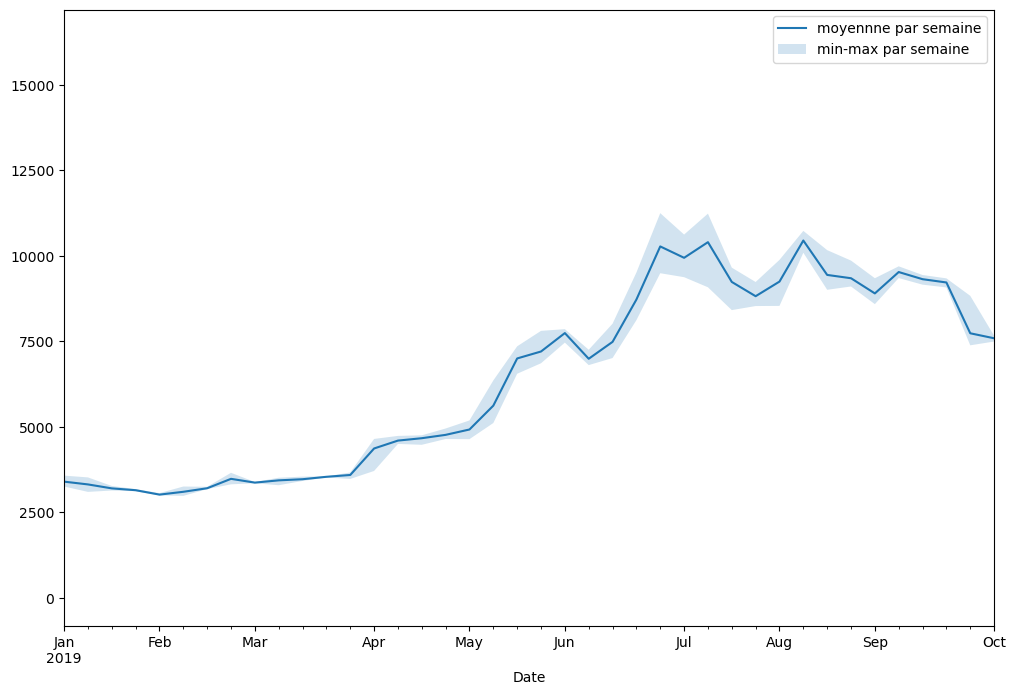

In [38]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min','max'])
plt.figure(figsize = (12,8))
m['mean']['2019'].plot(label='moyennne par semaine')
plt.fill_between(m.index,m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

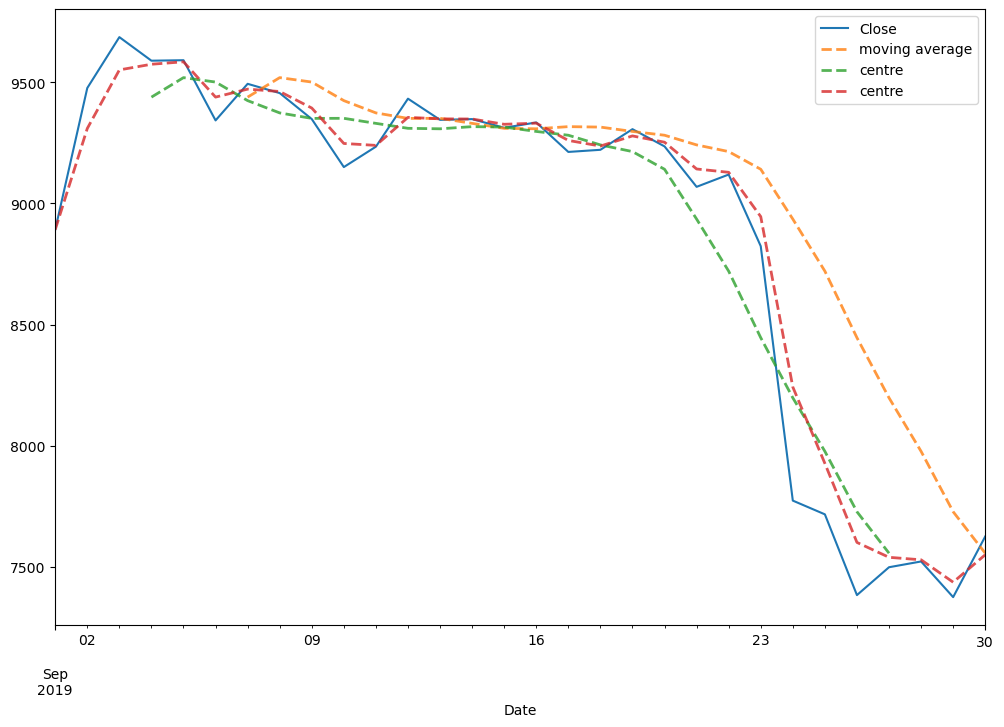

In [47]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=2, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=2, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='centre', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [48]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [53]:
btc_eth = pd.merge(bitcoin,ethereum, on='Date', how='inner', suffixes=('_btc','_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

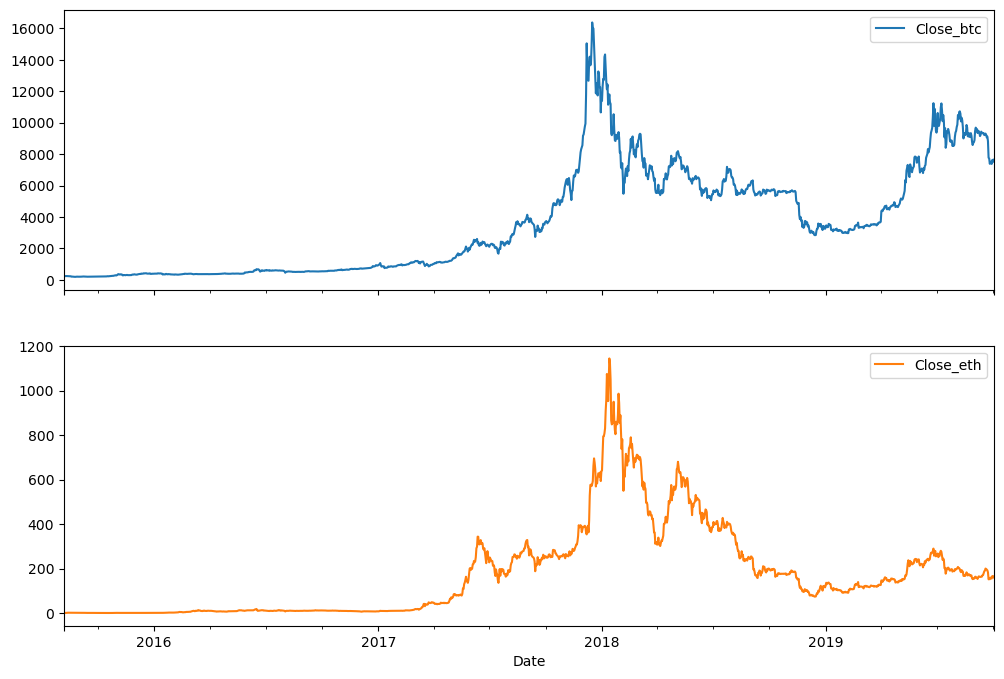

In [55]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12,8))

In [56]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.791416
Close_eth,0.791416,1.000000


In [6]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [10]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'],'Buy'] = 1
data.loc[data['RollingMax'] > data['Close'],'Sell'] = -1

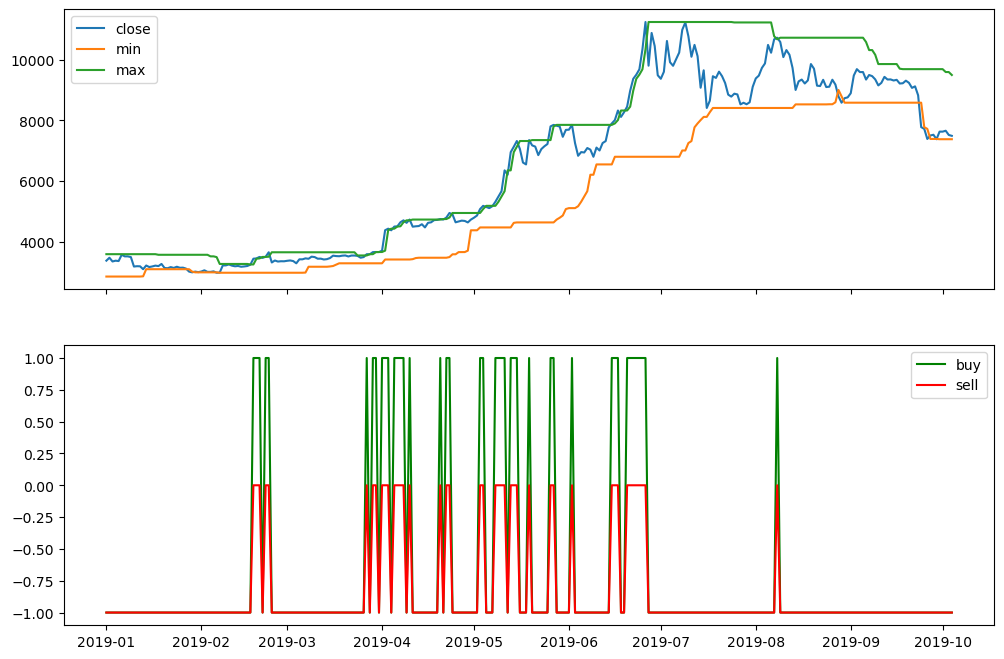

In [11]:
start ='2019'
end='2019'
fig, ax = plt.subplots(2,figsize=(12,8), sharex=True)
#plt.figure(figsize=(12,8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close','min','max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy','sell'])